In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import copy
import math

In [199]:
gun_violence = pd.read_csv('gun-violence-data_01-2013_03-2018.csv')

In [200]:
plt.rcParams['figure.figsize'] = (20, 30)
sns.set(font_scale=2)

In [201]:
gun_violence.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


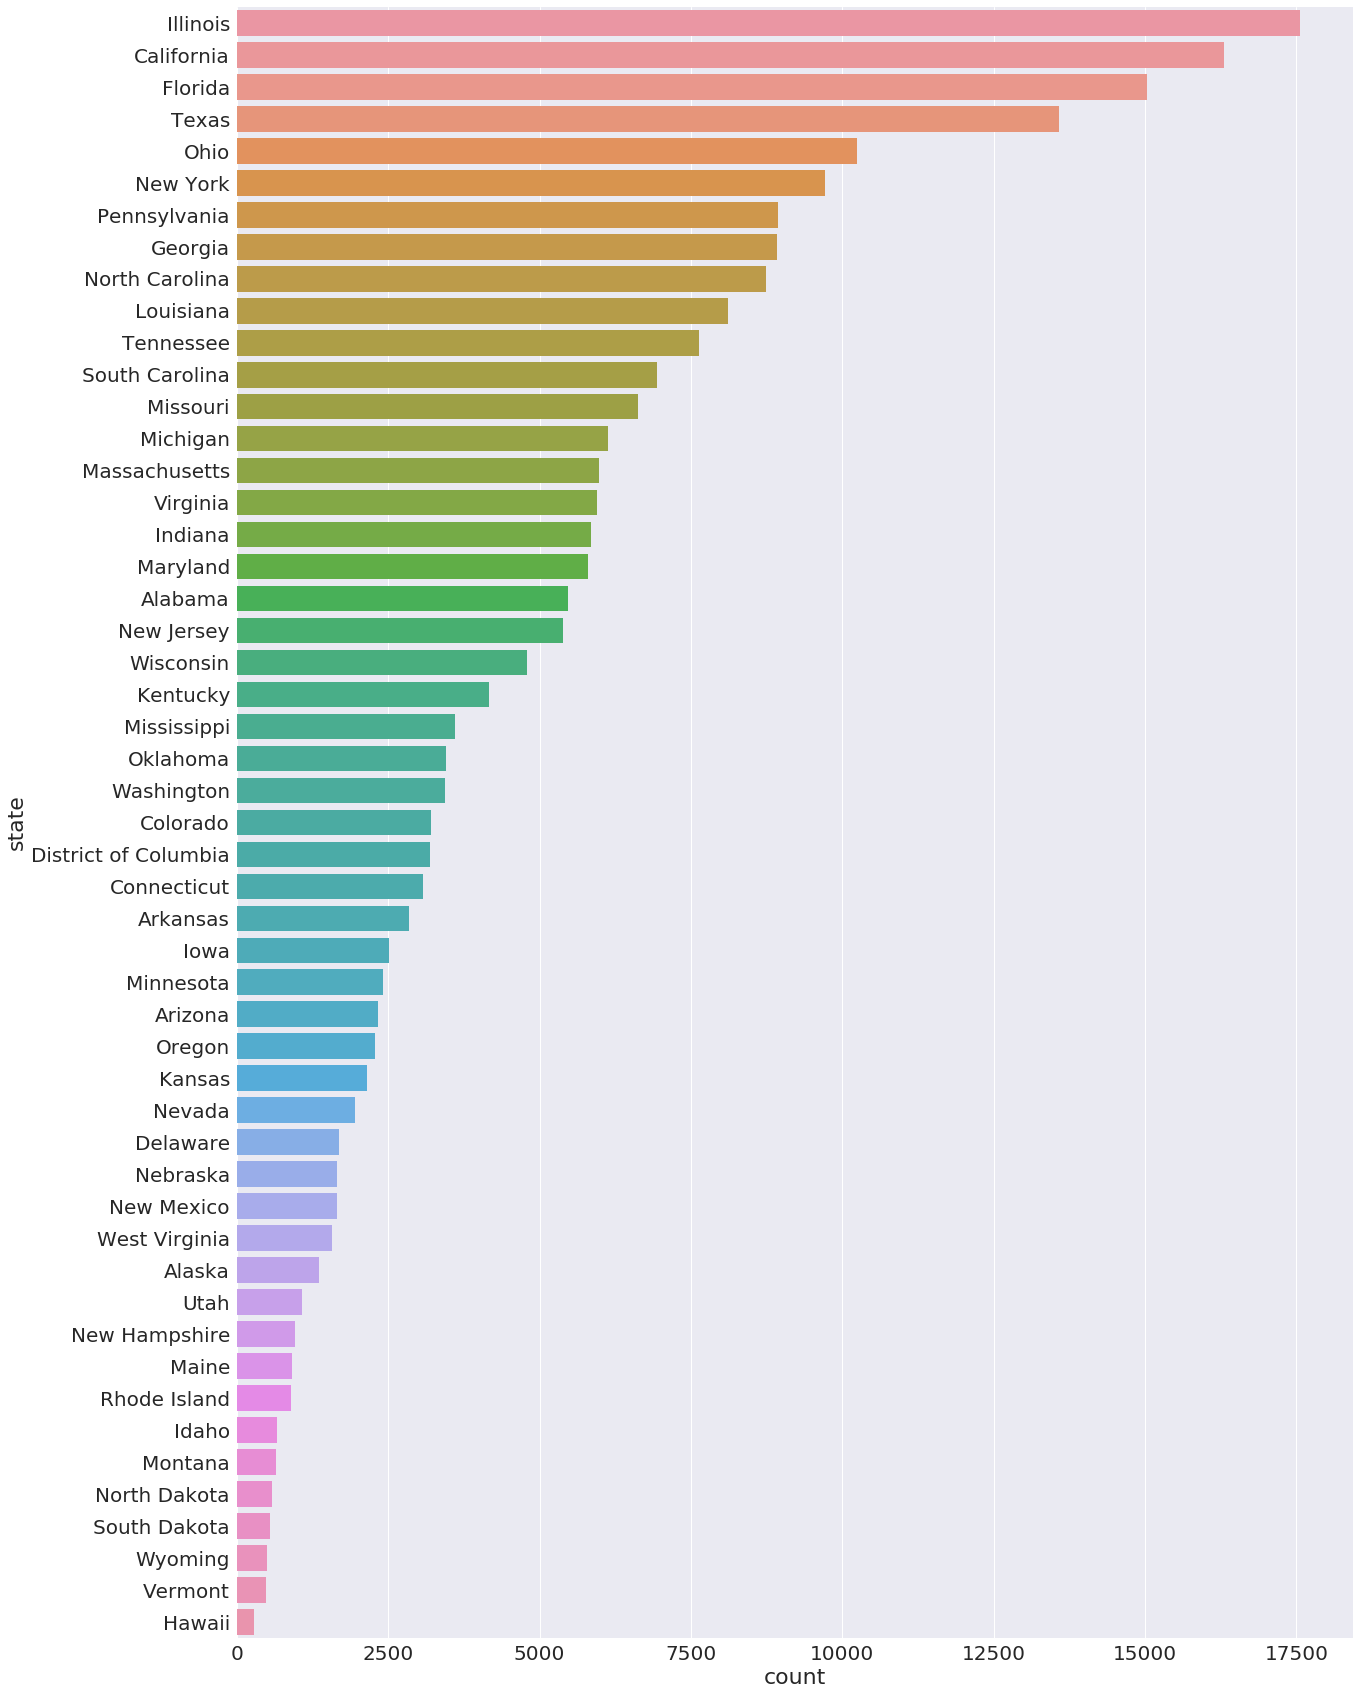

In [202]:
# Which states had the most incidences of gun violence?

sns.countplot(y='state', data=gun_violence, order=gun_violence['state'].value_counts().index)

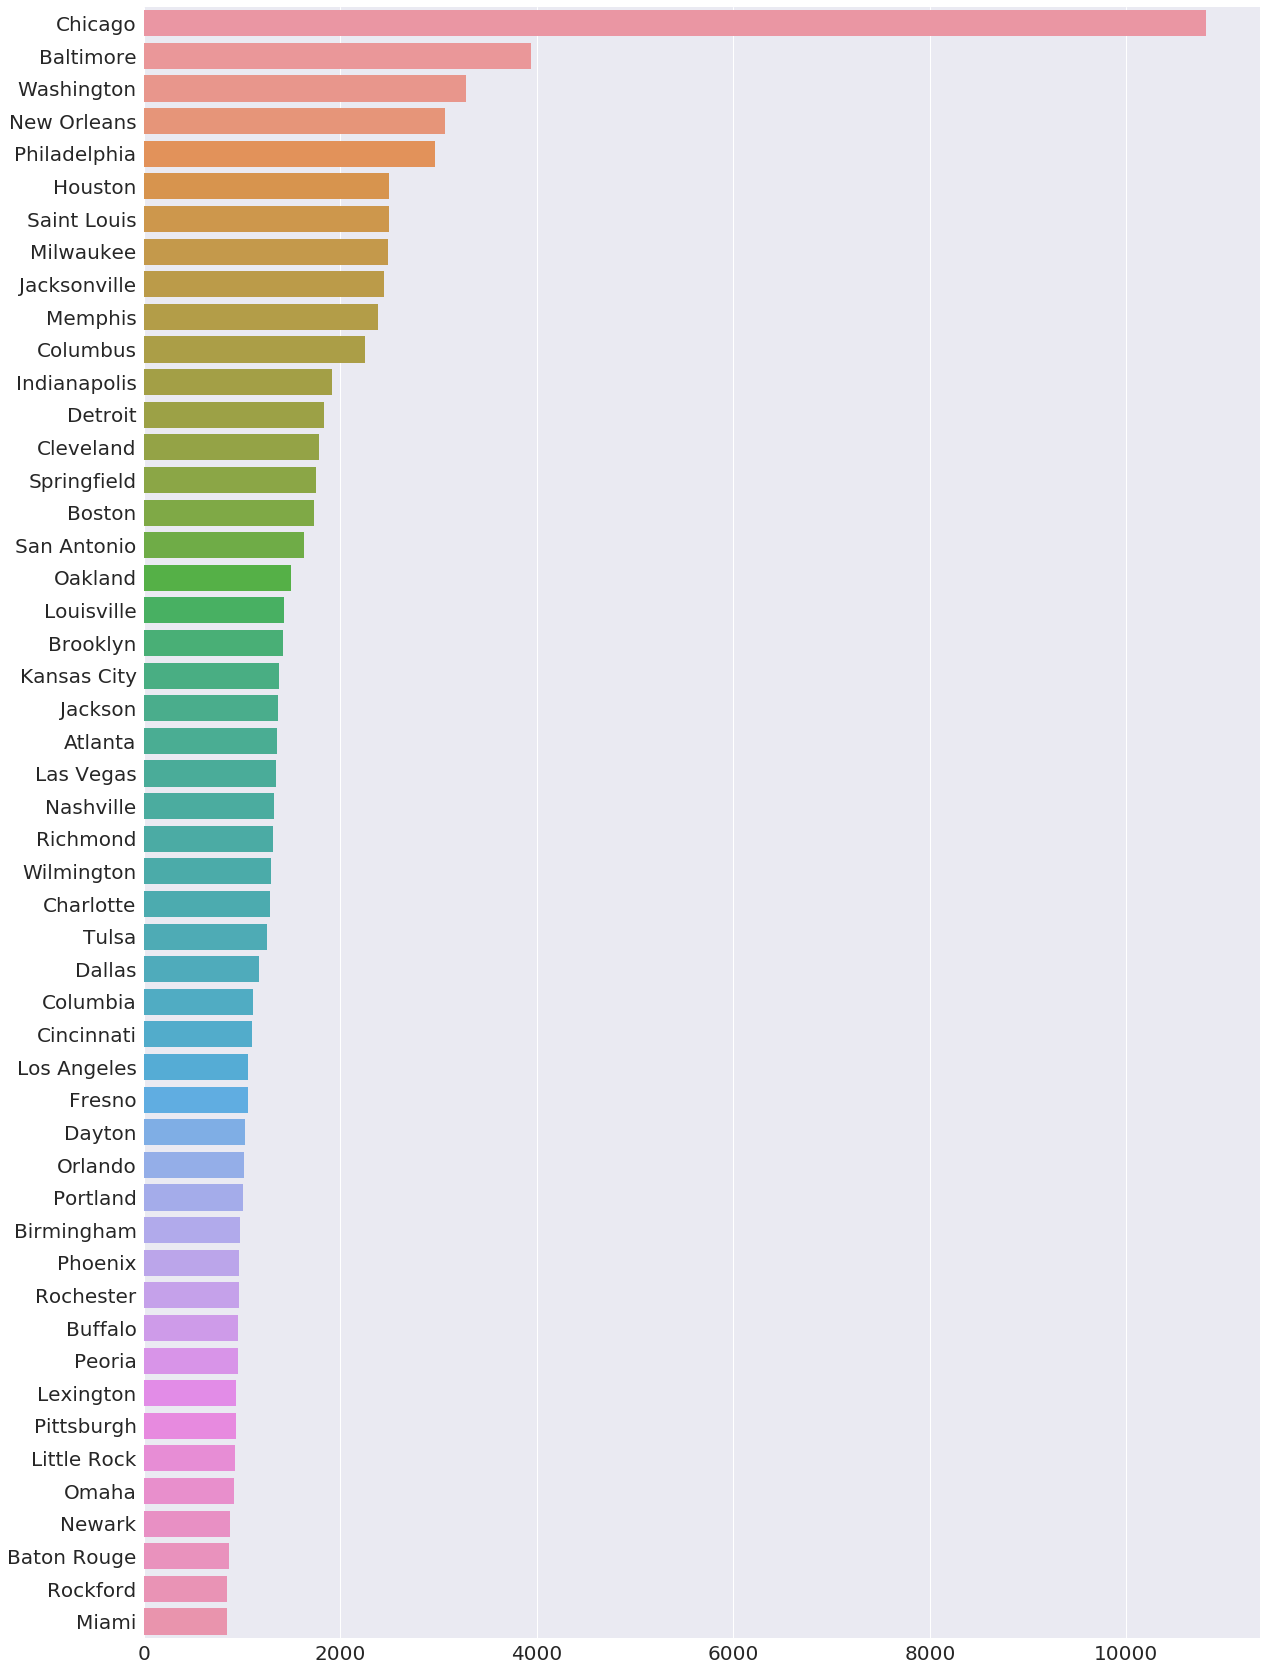

In [203]:
# Which cities/counties had the most incidences of gun violence?

cities_counties_most_gun_violence = gun_violence['city_or_county'].value_counts()
cities_counties_most_gun_violence = cities_counties_most_gun_violence.sort_values(ascending=False)
cities_counties_most_gun_violence.head(50)
cities_with_most_gun_violence_top_50 = cities_counties_most_gun_violence.head(50)
sns.barplot(y=cities_with_most_gun_violence_top_50.index, x=cities_with_most_gun_violence_top_50.values)

In [204]:
gun_violence.head(10)

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0
5,478948,2013-01-07,Oklahoma,Tulsa,6000 block of South Owasso,4,0,http://www.gunviolencearchive.org/incident/478948,http://usnews.nbcnews.com/_news/2013/01/07/163...,False,...,0::23||1::23||2::33||3::55,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Female||2::Female||3::Female||4:...,0::Rebeika Powell||1::Kayetie Melchor||2::Mist...,NaN,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.kjrh.com/news/local-news/4-found-sh...,72.0,11.0
6,479363,2013-01-19,New Mexico,Albuquerque,2806 Long Lane,5,0,http://www.gunviolencearchive.org/incident/479363,http://hinterlandgazette.com/2013/01/pastor-gr...,False,...,0::51||1::40||2::9||3::5||4::2||5::15,0::Adult 18+||1::Adult 18+||2::Child 0-11||3::...,0::Male||1::Female||2::Male||3::Female||4::Fem...,0::Greg Griego||1::Sara Griego||2::Zephania Gr...,5::Family,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.cbsnews.com/news/nehemiah-gringo-ca...,10.0,14.0
7,479374,2013-01-21,Louisiana,New Orleans,LaSalle Street and Martin Luther King Jr. Boul...,0,5,http://www.gunviolencearchive.org/incident/479374,http://www.nola.com/crime/index.ssf/2013/01/no...,False,...,NaN,NaN,0:

In [205]:
gun_violence['date'] = pd.to_datetime(gun_violence['date'], format="%Y-%m-%d")
gun_violence.head(10)

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0
5,478948,2013-01-07,Oklahoma,Tulsa,6000 block of South Owasso,4,0,http://www.gunviolencearchive.org/incident/478948,http://usnews.nbcnews.com/_news/2013/01/07/163...,False,...,0::23||1::23||2::33||3::55,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Female||2::Female||3::Female||4:...,0::Rebeika Powell||1::Kayetie Melchor||2::Mist...,NaN,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.kjrh.com/news/local-news/4-found-sh...,72.0,11.0
6,479363,2013-01-19,New Mexico,Albuquerque,2806 Long Lane,5,0,http://www.gunviolencearchive.org/incident/479363,http://hinterlandgazette.com/2013/01/pastor-gr...,False,...,0::51||1::40||2::9||3::5||4::2||5::15,0::Adult 18+||1::Adult 18+||2::Child 0-11||3::...,0::Male||1::Female||2::Male||3::Female||4::Fem...,0::Greg Griego||1::Sara Griego||2::Zephania Gr...,5::Family,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.cbsnews.com/news/nehemiah-gringo-ca...,10.0,14.0
7,479374,2013-01-21,Louisiana,New Orleans,LaSalle Street and Martin Luther King Jr. Boul...,0,5,http://www.gunviolencearchive.org/incident/479374,http://www.nola.com/crime/index.ssf/2013/01/no...,False,...,NaN,NaN,0:

In [206]:
# creates a new dataframe of rows of states keeping the dates of gun violence incidents
state_and_date_gun_incidences = gun_violence.sort_values(by=['state', 'date']).copy()
# state_and_date_gun_incidences = state_and_date_gun_incidences.set_index(['state'])
state_and_date_gun_incidences = state_and_date_gun_incidences.drop(columns=['city_or_county', 'address', 'n_killed', 'n_injured', 'incident_url', 'source_url', 'incident_url_fields_missing', 'congressional_district', 'participant_age', 'participant_age_group', 'participant_gender'])
state_and_date_gun_incidences = state_and_date_gun_incidences.drop(columns=['gun_stolen', 'gun_type', 'incident_characteristics', 'latitude', 'location_description', 'longitude', 'n_guns_involved', 'notes', 'participant_name', 'participant_relationship'])
state_and_date_gun_incidences = state_and_date_gun_incidences.drop(columns=['participant_status', 'incident_id', 'participant_status', 'sources', 'state_house_district', 'state_senate_district', 'participant_type'])
state_and_date_gun_incidences.head(10)

,date,state
127,2013-07-06,Alabama
272,2013-12-28,Alabama
296,2014-01-01,Alabama
315,2014-01-01,Alabama
320,2014-01-01,Alabama
383,2014-01-01,Alabama
394,2014-01-01,Alabama
396,2014-01-01,Alabama
400,2014-01-01,Alabama
465,2014-01-01,Alabama


In [207]:
state_and_date_gun_incidences_2013 = state_and_date_gun_incidences.loc[(state_and_date_gun_incidences['date'].dt.year == 2013)].copy()
state_and_date_gun_incidences_2014 = state_and_date_gun_incidences.loc[(state_and_date_gun_incidences['date'].dt.year == 2014)].copy()
state_and_date_gun_incidences_2015 = state_and_date_gun_incidences.loc[(state_and_date_gun_incidences['date'].dt.year == 2015)].copy()

In [208]:
def extract_month_from_date(date):
    if date.month == 1:
        return "January"
    elif date.month == 2:
        return "February"
    elif date.month == 3:
        return "March"
    elif date.month == 4:
        return "April"
    elif date.month == 5:
        return "May"
    elif date.month == 6:
        return "June"
    elif date.month == 7:
        return "July"
    elif date.month == 8:
        return "August"
    elif date.month == 9:
        return "September"
    elif date.month == 10:
        return "October"
    elif date.month == 11:
        return "November"
    elif date.month == 12:
        return "December"
    
state_and_date_gun_incidences_2013['month'] = state_and_date_gun_incidences_2013['date'].apply(extract_month_from_date)
state_and_date_gun_incidences_2014['month'] = state_and_date_gun_incidences_2014['date'].apply(extract_month_from_date)
state_and_date_gun_incidences_2015['month'] = state_and_date_gun_incidences_2015['date'].apply(extract_month_from_date)
# state_and_date_gun_incidences_2013

In [235]:
state_and_date_gun_incidences_2013_aggregated_months = state_and_date_gun_incidences_2013.copy()
state_and_date_gun_incidences_2014_aggregated_months = state_and_date_gun_incidences_2014.copy()
state_and_date_gun_incidences_2015_aggregated_months = state_and_date_gun_incidences_2015.copy()
# state_and_date_gun_incidences_2013_aggregated_months
# state_and_date_gun_incidences_2013_aggregated_months['monthly incidences'] = state_and_date_gun_incidences_2013_aggregated_months.apply(state_and_date_gun_incidences_2013.groupby(['state', 'month']).size())
state_and_date_gun_incidences_2013_aggregated_months = state_and_date_gun_incidences_2013.groupby(['state', 'month']).size().copy()
state_and_date_gun_incidences_2014_aggregated_months = state_and_date_gun_incidences_2014.groupby(['state', 'month']).size().copy()
state_and_date_gun_incidences_2015_aggregated_months = state_and_date_gun_incidences_2015.groupby(['state', 'month']).size().copy()

In [236]:
state_and_date_gun_incidences_2013_aggregated_months.head(25)
state_and_date_gun_incidences_2014_aggregated_months.head(25)
state_and_date_gun_incidences_2015_aggregated_months.head(25)

state    month    
Alabama  April         80
         August        97
         December      77
         February      66
         January       86
         July          97
         June          78
         March         92
         May           97
         November      80
         October      105
         September     79
Alaska   April         38
         August        44
         December      23
         February      26
         January       25
         July          29
         June          29
         March         39
         May           45
         November      16
         October       31
         September     35
Arizona  April         38
dtype: int64

In [237]:
state_and_date_gun_incidences_2013_aggregated_months = pd.DataFrame(state_and_date_gun_incidences_2013_aggregated_months)
state_and_date_gun_incidences_2014_aggregated_months = pd.DataFrame(state_and_date_gun_incidences_2014_aggregated_months)
state_and_date_gun_incidences_2015_aggregated_months = pd.DataFrame(state_and_date_gun_incidences_2015_aggregated_months)

# state_and_date_gun_incidences_2013_aggregated_months.index

In [238]:
state_and_date_gun_incidences_2013_aggregated_months = state_and_date_gun_incidences_2013_aggregated_months.reset_index()
state_and_date_gun_incidences_2013_aggregated_months = state_and_date_gun_incidences_2013_aggregated_months.rename({'state':'state', 'month':'month', 0:'monthly incidences'}, axis='columns')

state_and_date_gun_incidences_2014_aggregated_months = state_and_date_gun_incidences_2014_aggregated_months.reset_index()
state_and_date_gun_incidences_2014_aggregated_months = state_and_date_gun_incidences_2014_aggregated_months.rename({'state':'state', 'month':'month', 0:'monthly incidences'}, axis='columns')

state_and_date_gun_incidences_2015_aggregated_months = state_and_date_gun_incidences_2015_aggregated_months.reset_index()
state_and_date_gun_incidences_2015_aggregated_months = state_and_date_gun_incidences_2015_aggregated_months.rename({'state':'state', 'month':'month', 0:'monthly incidences'}, axis='columns')

In [239]:
state_and_date_gun_incidences_2013_aggregated_months = state_and_date_gun_incidences_2013_aggregated_months.set_index(['state'])
state_and_date_gun_incidences_2014_aggregated_months = state_and_date_gun_incidences_2014_aggregated_months.set_index(['state'])
state_and_date_gun_incidences_2015_aggregated_months = state_and_date_gun_incidences_2015_aggregated_months.set_index(['state'])

In [240]:
state_and_date_gun_incidences_2015_aggregated_months.head()
# list(state_and_date_gun_incidences_2013_aggregated_months)

,month,monthly incidences
state,,
Alabama,April,80
Alabama,August,97
Alabama,December,77
Alabama,February,66
Alabama,January,86


In [241]:
df_index_2013 = state_and_date_gun_incidences_2013_aggregated_months.index.copy()
df_index_2014 = state_and_date_gun_incidences_2014_aggregated_months.index.copy()
df_index_2015 = state_and_date_gun_incidences_2015_aggregated_months.index.copy()

state_and_date_gun_incidences_2013_aggregated_months = state_and_date_gun_incidences_2013_aggregated_months.pivot_table(values='monthly incidences', index=df_index_2013, columns='month', aggfunc='first')
state_and_date_gun_incidences_2013_aggregated_months = state_and_date_gun_incidences_2013_aggregated_months[['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']]

state_and_date_gun_incidences_2014_aggregated_months = state_and_date_gun_incidences_2014_aggregated_months.pivot_table(values='monthly incidences', index=df_index_2014, columns='month', aggfunc='first')
state_and_date_gun_incidences_2014_aggregated_months = state_and_date_gun_incidences_2014_aggregated_months[['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']]

state_and_date_gun_incidences_2015_aggregated_months = state_and_date_gun_incidences_2015_aggregated_months.pivot_table(values='monthly incidences', index=df_index_2015, columns='month', aggfunc='first')
state_and_date_gun_incidences_2015_aggregated_months = state_and_date_gun_incidences_2015_aggregated_months[['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']]

In [243]:
# state_and_date_gun_incidences_2013_aggregated_months
state_and_date_gun_incidences_2014_aggregated_months
# state_and_date_gun_incidences_2015_aggregated_months

month,January,February,March,April,May,June,July,August,September,October,November,December
state,,,,,,,,,,,,
Alabama,132.0,99.0,112.0,122.0,110.0,125.0,140.0,120.0,89.0,92.0,85.0,92.0
Alaska,9.0,9.0,18.0,12.0,9.0,8.0,8.0,16.0,16.0,15.0,14.0,12.0
Arizona,46.0,44.0,46.0,38.0,45.0,39.0,65.0,49.0,62.0,38.0,34.0,50.0
Arkansas,57.0,39.0,44.0,39.0,52.0,43.0,54.0,59.0,59.0,48.0,37.0,41.0
California,277.0,211.0,253.0,249.0,276.0,259.0,319.0,432.0,452.0,415.0,352.0,237.0
Colorado,51.0,31.0,33.0,26.0,55.0,40.0,59.0,58.0,49.0,65.0,42.0,47.0
Connecticut,43.0,21.0,38.0,39.0,60.0,46.0,69.0,81.0,54.0,53.0,33.0,46.0
Delaware,39.0,17.0,20.0,39.0,55.0,52.0,50.0,72.0,43.0,49.0,39.0,18.0
District of Columbia,106.0,50.0,30.0,49.0,58.0,83.0,72.0,102.0,83.0,110.0,43.0,52.0


In [244]:
def convert_NaN_to_zero(not_a_number):
    if(math.isnan(not_a_number)):
        not_a_number = 0
    return not_a_number
        
state_and_date_gun_incidences_2013_aggregated_months = state_and_date_gun_incidences_2013_aggregated_months.applymap(convert_NaN_to_zero)
state_and_date_gun_incidences_2014_aggregated_months = state_and_date_gun_incidences_2014_aggregated_months.applymap(convert_NaN_to_zero)
state_and_date_gun_incidences_2015_aggregated_months = state_and_date_gun_incidences_2015_aggregated_months.applymap(convert_NaN_to_zero)


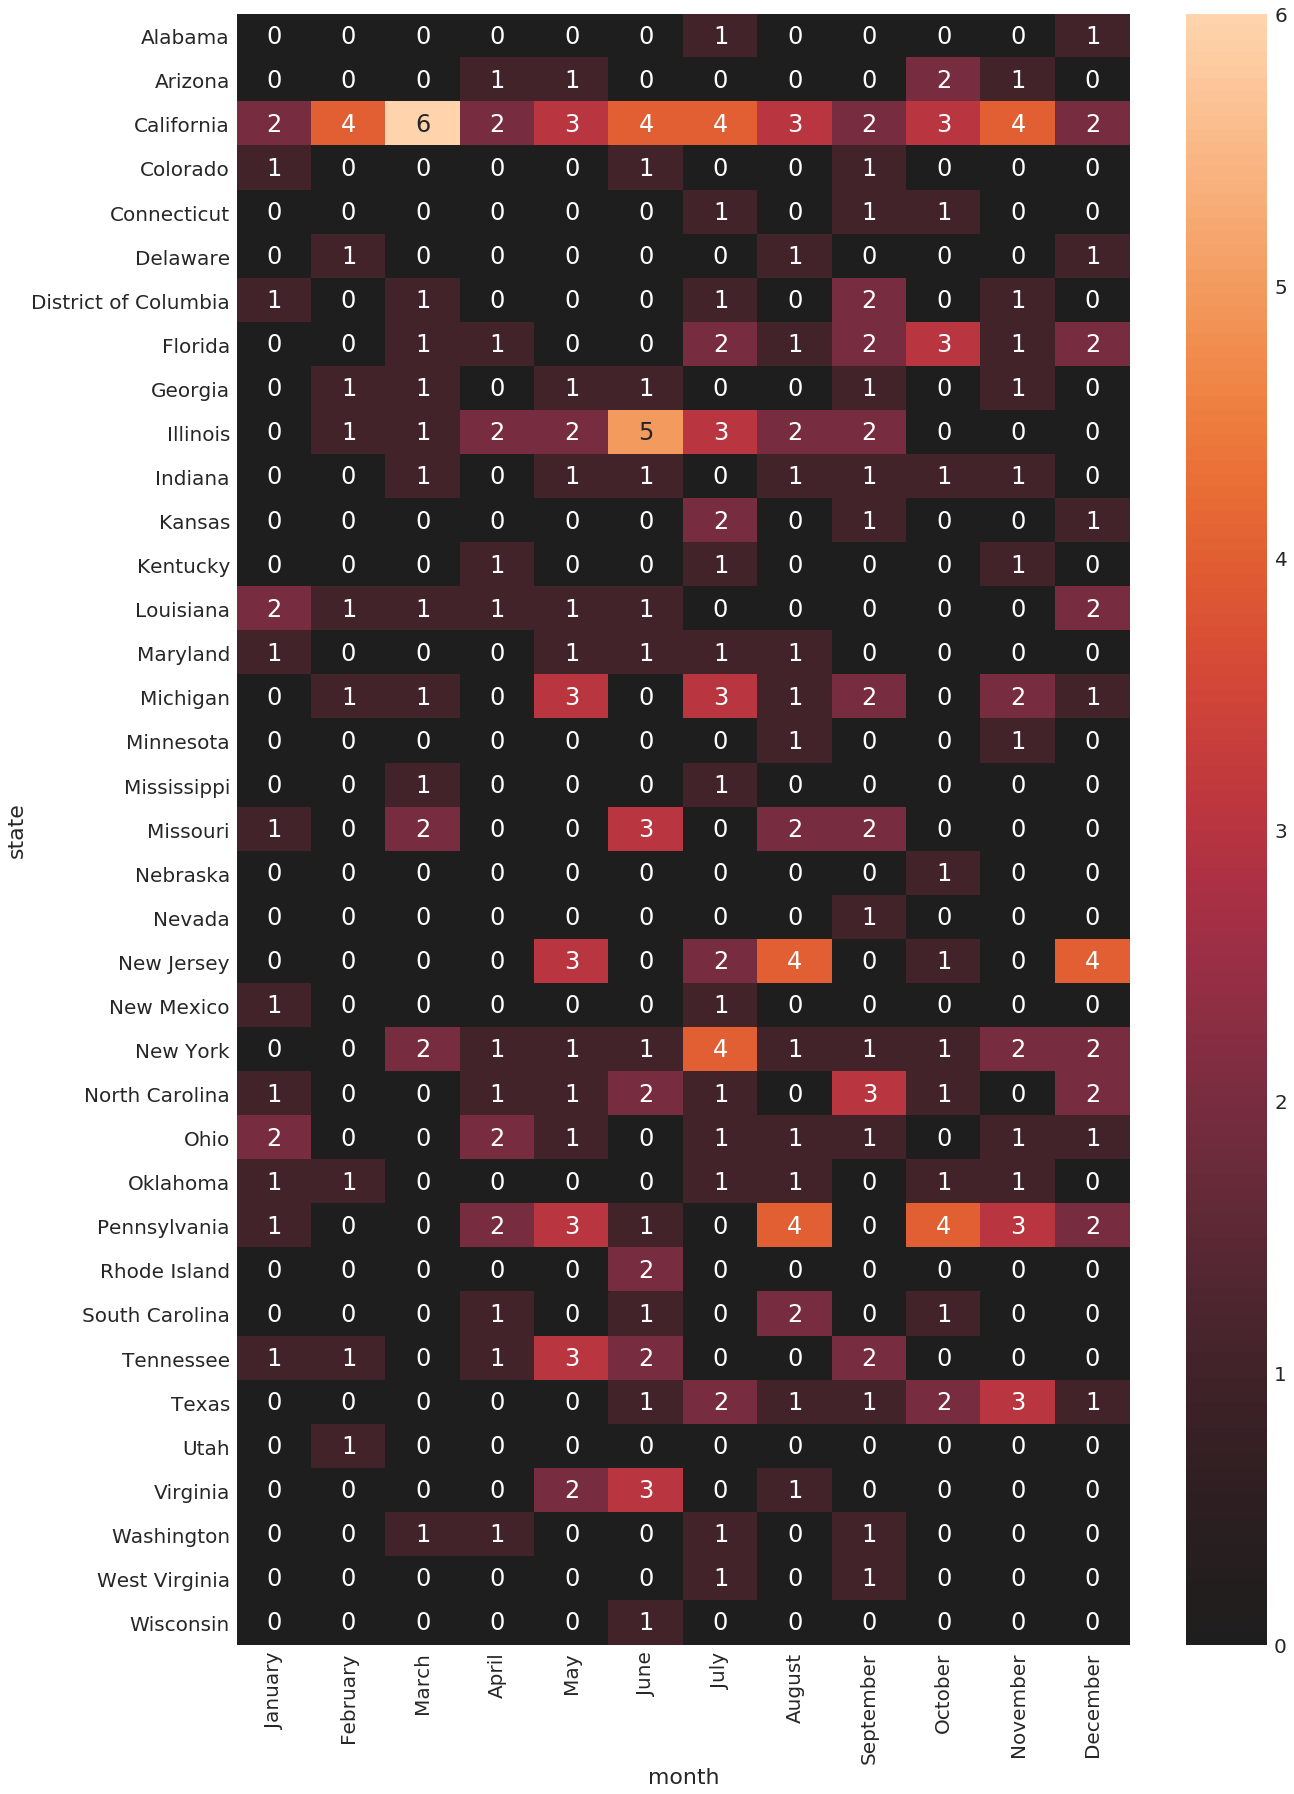

In [246]:
sns.heatmap(data=state_and_date_gun_incidences_2013_aggregated_months, vmin=0.0, vmax=6.0, annot=True, center=0)

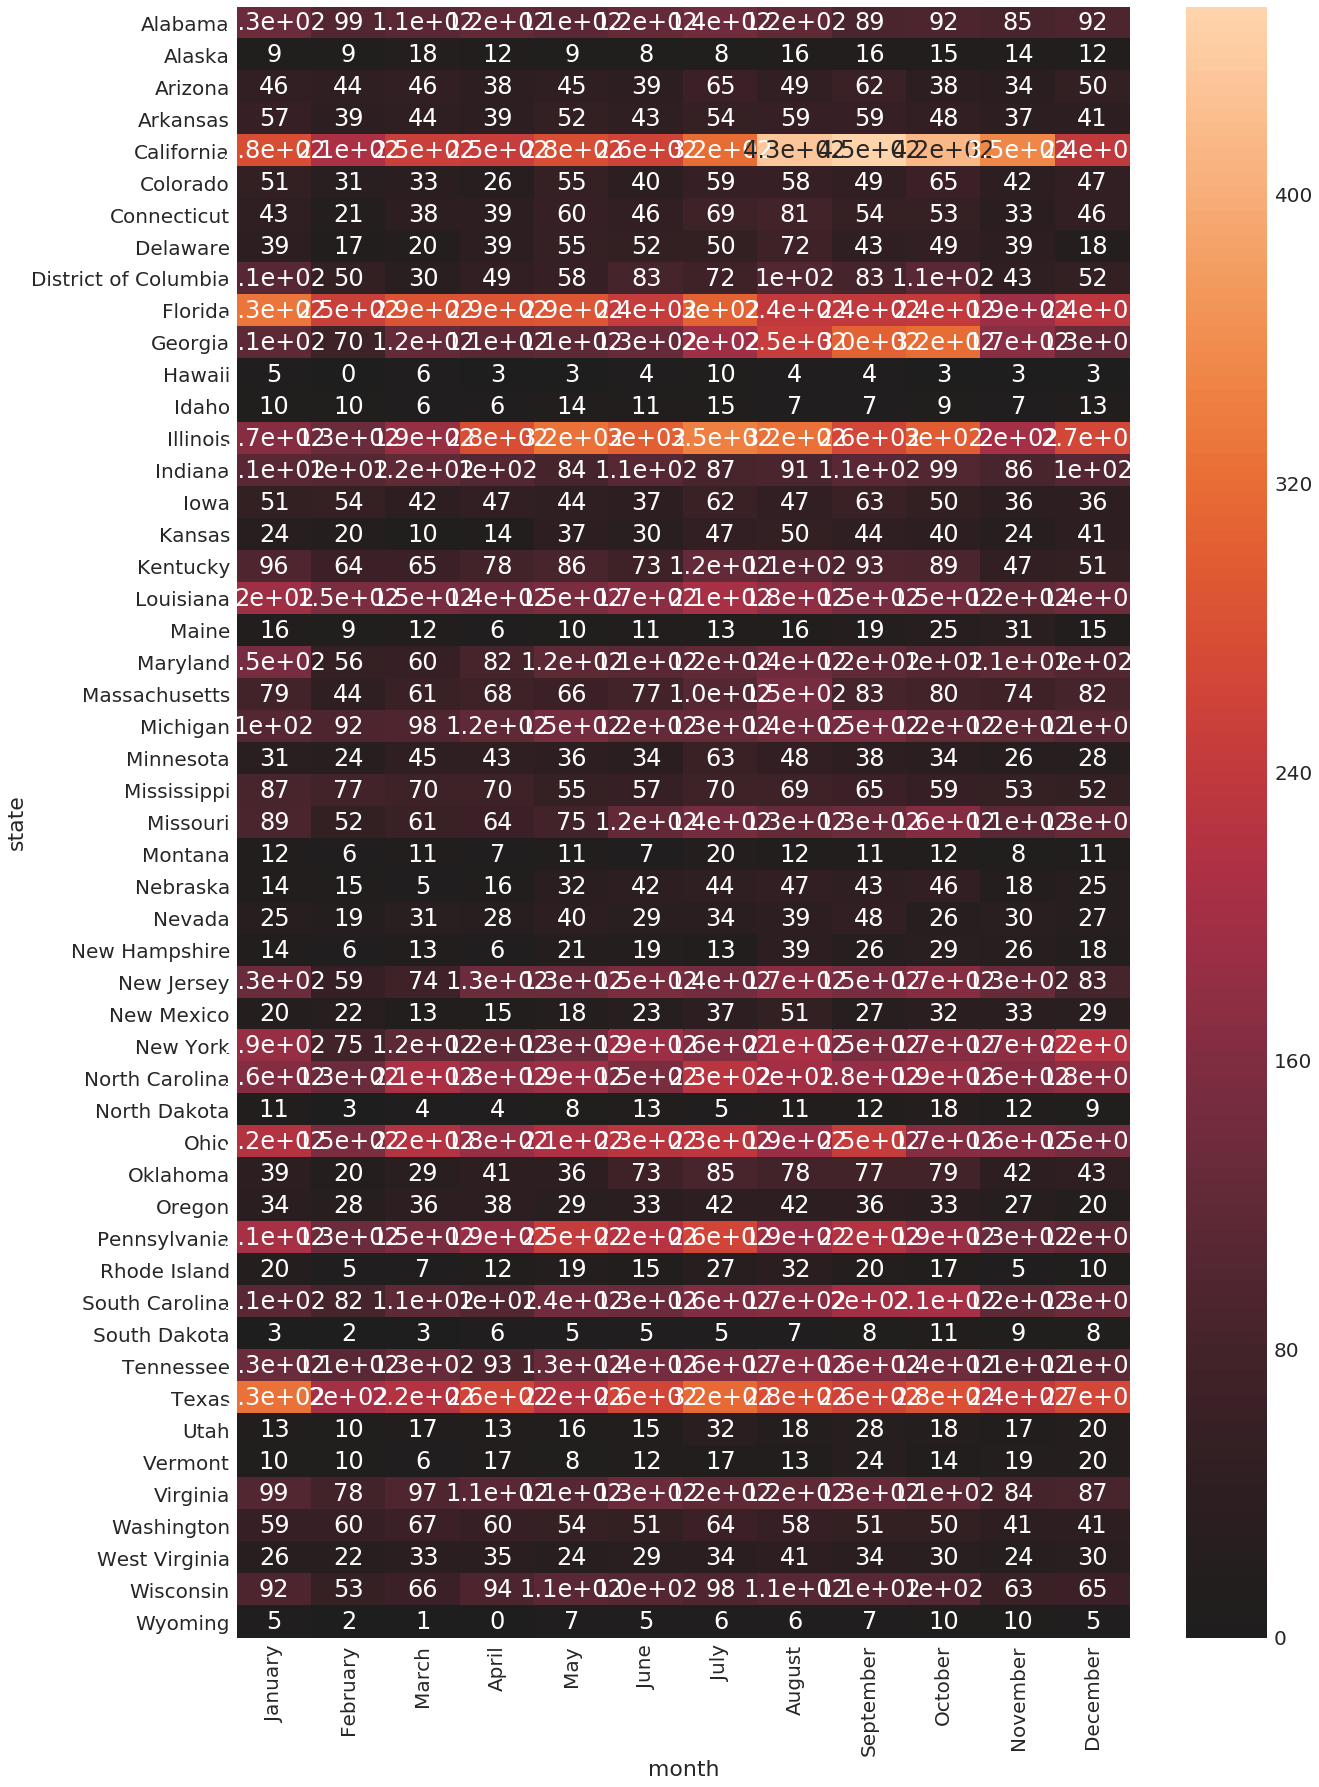

In [248]:
sns.heatmap(data=state_and_date_gun_incidences_2014_aggregated_months, annot=True, center=0)

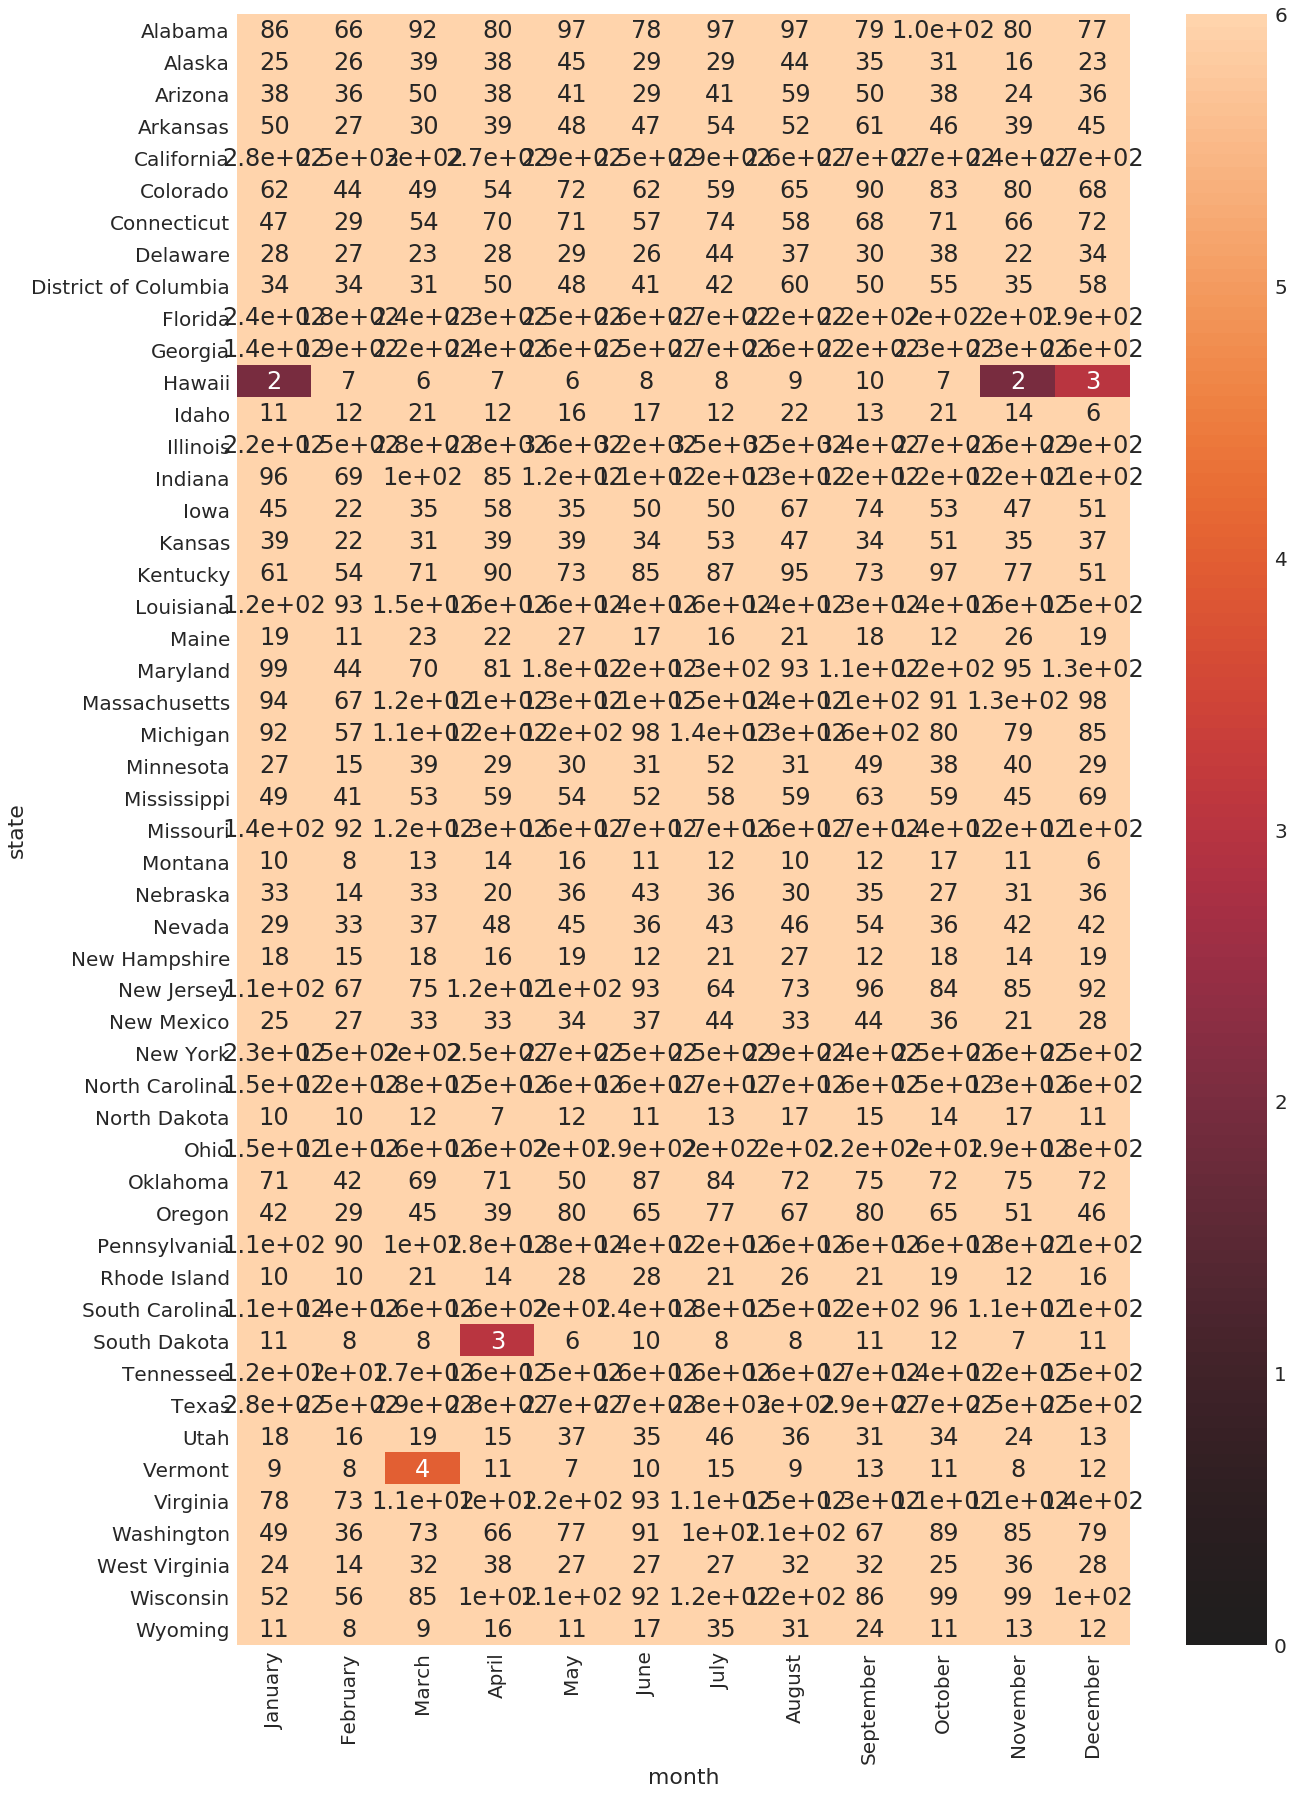

In [247]:
sns.heatmap(data=state_and_date_gun_incidences_2015_aggregated_months, annot=True, center=0)